In [1]:
# importing the necessary libraries

import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import pickle

In [2]:
# reading the datasets

data = pd.read_csv('stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# printing the no. of rows and no. of columns

data.shape

(5110, 12)

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data['bmi'] = data['bmi'].fillna(data.bmi.median())

In [8]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
cor=data.corr()
cor.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


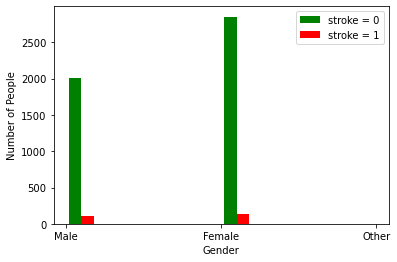

In [9]:
gender_stroke_0 = data[data.stroke==0].gender
gender_stroke_1 = data[data.stroke==1].gender

plt.hist([gender_stroke_0,gender_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend()

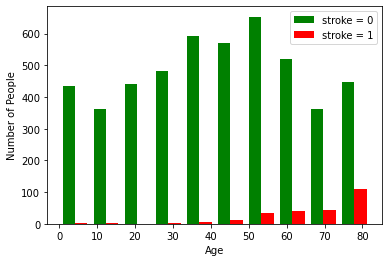

In [10]:
age_stroke_0 = data[data.stroke==0].age
age_stroke_1 = data[data.stroke==1].age

plt.hist([age_stroke_0,age_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend()

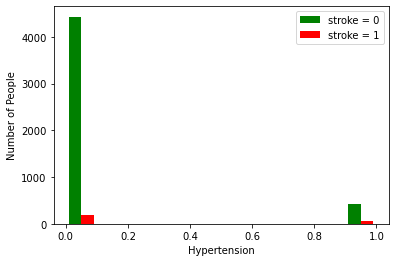

In [8]:
hypertension_stroke_0 = data[data.stroke==0].hypertension
hypertension_stroke_1 = data[data.stroke==1].hypertension

plt.hist([hypertension_stroke_0,hypertension_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Hypertension')
plt.ylabel('Number of People')
plt.legend()

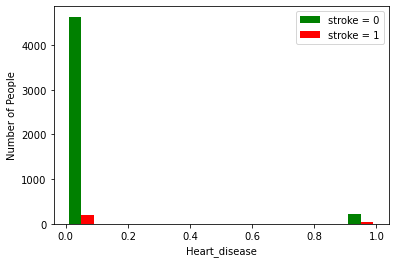

In [9]:
heart_disease_stroke_0 = data[data.stroke==0].heart_disease
heart_disease_stroke_1 = data[data.stroke==1].heart_disease

plt.hist([heart_disease_stroke_0,heart_disease_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Heart_disease')
plt.ylabel('Number of People')
plt.legend()

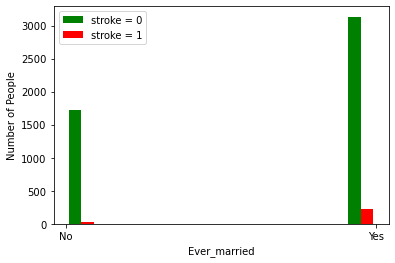

In [10]:
ever_married_stroke_0 = data[data.stroke==0].ever_married
ever_married_stroke_1 = data[data.stroke==1].ever_married

plt.hist([ever_married_stroke_0,ever_married_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Ever_married')
plt.ylabel('Number of People')
plt.legend()

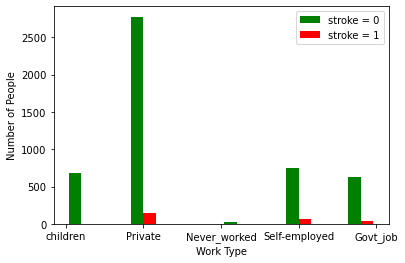

In [11]:
work_type_stroke_0 = data[data.stroke==0].work_type
work_type_stroke_1 = data[data.stroke==1].work_type

plt.hist([work_type_stroke_0,work_type_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Work Type')
plt.ylabel('Number of People')
plt.legend()

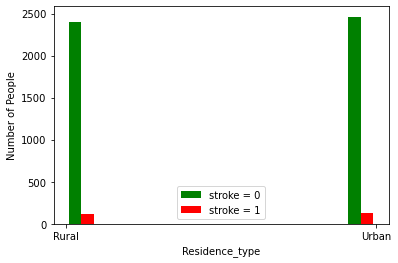

In [12]:
Residence_type_stroke_0 = data[data.stroke==0].Residence_type
Residence_type_stroke_1 = data[data.stroke==1].Residence_type

plt.hist([Residence_type_stroke_0,Residence_type_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('Residence_type')
plt.ylabel('Number of People')
plt.legend()

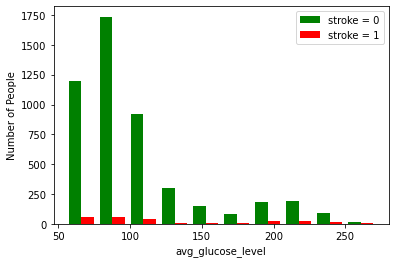

In [13]:
avg_glucose_level_stroke_0 = data[data.stroke==0].avg_glucose_level
avg_glucose_level_stroke_1 = data[data.stroke==1].avg_glucose_level

plt.hist([avg_glucose_level_stroke_0,avg_glucose_level_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('avg_glucose_level')
plt.ylabel('Number of People')
plt.legend()

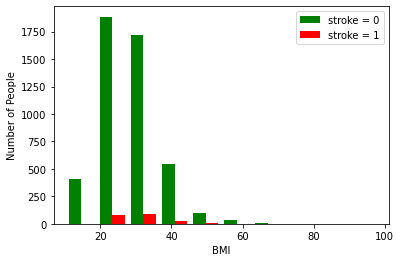

In [14]:
bmi_stroke_0 = data[data.stroke==0].bmi
bmi_stroke_1 = data[data.stroke==1].bmi

plt.hist([bmi_stroke_0,bmi_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.legend()

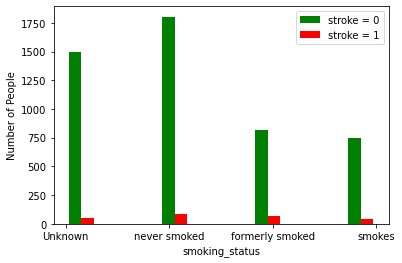

In [15]:
smoking_status_stroke_0 = data[data.stroke==0].smoking_status
smoking_status_stroke_1 = data[data.stroke==1].smoking_status

plt.hist([smoking_status_stroke_0,smoking_status_stroke_1], color=['green','red'], label=['stroke = 0','stroke = 1'])
plt.xlabel('smoking_status')
plt.ylabel('Number of People')
plt.legend()

In [4]:
# dropping the unnecessary column

data.drop('id', axis=1, inplace=True)

In [20]:
data.shape

(5110, 11)

In [5]:
# Converting the categorical values into numerical 

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [9]:
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [23]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [10]:
x = data.drop('stroke', axis=1)
y = data['stroke']

In [25]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x,y)

y.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=4, stratify=y)

In [28]:
y_test.value_counts()

0    1459
1    1458
Name: stroke, dtype: int64

In [29]:
x_test.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4889,0,24.000000,0,0,1,0,1,83.100000,42.500000,3
461,0,16.000000,0,0,0,4,0,113.470000,19.500000,0
2589,0,62.000000,0,0,1,3,0,102.210000,36.300000,2
5200,0,77.808648,1,0,0,2,1,129.313436,22.262273,2
1432,1,1.000000,0,0,0,4,1,101.310000,18.300000,0
1518,0,32.000000,0,0,0,2,0,67.920000,22.800000,3
7438,0,69.796198,0,0,1,2,1,222.063011,46.759519,1
9010,1,61.093131,0,0,1,3,0,75.931189,27.337095,2
7828,0,68.464930,0,0,0,0,0,80.761001,26.472344,0
305,1,43.000000,0,0,1,2,1,146.010000,31.500000,3


In [145]:
y_test.head(10)

4889    0
461     0
2589    0
5200    1
1432    0
1518    0
7438    1
9010    1
7828    1
305     0
Name: stroke, dtype: int64

In [13]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [14]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), BernoulliNB(), SVC()]

In [15]:
recall =[]
accuracy =[]

for model in models:
    cv = cross_val_score(model, x_train, y_train, scoring='recall',cv=10).mean()
    recall.append(cv)
    
    cv = cross_val_score(model, x_train, y_train, scoring='accuracy',cv=10).mean()
    accuracy.append(cv)

In [16]:
model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
            'RandomForestClassifier', 'BernoulliNB', 'SVC']

score = pd.DataFrame({'Model':model, 'Accuracy':accuracy, 'Recall':recall})
score.style.background_gradient(high=1,axis=0)

,Model,Accuracy,Recall
0,LogisticRegression,0.802052,0.821335
1,KNeighborsClassifier,0.863043,0.935354
2,DecisionTreeClassifier,0.898309,0.914484
3,RandomForestClassifier,0.936663,0.957094
4,BernoulliNB,0.765468,0.818699
5,SVC,0.849815,0.888919


In [17]:
rfc = RandomForestClassifier()

In [19]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
rfc.score(x_test, y_test)

0.936235858758999

In [21]:
y_pred = rfc.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [39]:
y_test[:10]

4889    0
461     0
2589    0
5200    1
1432    0
1518    0
7438    1
9010    1
7828    1
305     0
Name: stroke, dtype: int64

In [40]:
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1459
           1       0.92      0.95      0.94      1458

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



C:\Users\shree\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


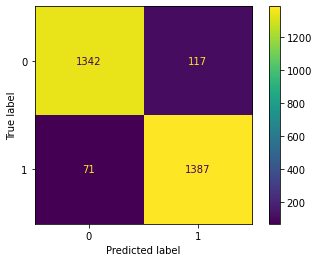

In [41]:
import matplotlib.pyplot as plt
plot_confusion_matrix(rfc,x_test,y_test)
plt.show()

In [42]:
pickle.dump(rfc, open('stroke.pkl', 'wb'))

In [42]:
from sklearn.preprocessing import MinMaxScaler
def check(x):
    c = np.array(x)
    data1 = MinMaxScaler().fit_transform(c[:,np.newaxis])
    data1 = pd.DataFrame(data1)
    data1 = data1.T
    print(data1)

    return(rfc.predict(data1))

In [43]:
check([1,43,1,1,1,0,1,146.01,31.5,4])

          0       1         2         3         4    5         6    7  \
0  0.006849  0.2945  0.006849  0.006849  0.006849  0.0  0.006849  1.0   

          8         9  
0  0.215739  0.027395  


array([1], dtype=int64)

In [35]:
check([0,1,0,0,1,0,0,146.010000,31.5,1])

array([0], dtype=int64)